# Libraries

In [1]:
# import libraries
# ================

# for date and time opeations
from datetime import datetime

# for file and folder operations
import os

# for regular expression opeations
import re

# for listing files in a folder
import glob

# for getting web contents
import requests 

# storing and analysing data
import pandas as pd

# for scraping web contents
from bs4 import BeautifulSoup

#for regular expressions
import re

#for numercial operations
import numpy as np


# Web Scrapping

In [48]:
# get data
# ========

# link at which web data recides
link = 'https://www.mohfw.gov.in/'


# get web data
req = requests.get(link)

# parse web data
soup = BeautifulSoup(req.content, "html.parser")


# soup
# req response 200

In [49]:
# find the table
# ==============
# our target table is the last table in the page

# get the table head
# table head may contain the column names, titles, subtitles
thead = soup.find_all('thead')[-1]
# print(thead)

# get all the rows in table head
# it usually have only one row, which has the column names
head = thead.find_all('tr')
# print(head)

# get the table tbody
# it contains the contents
tbody = soup.find_all('tbody')[-1]
# print(tbody)

# get all the rows in table body
# each row is each state's entry
body = tbody.find_all('tr')
# print(body)

In [50]:
# get the table contents
# ======================

# container for header rows / column title
head_rows = []
# container for table body / contents
body_rows = []

# loop through the head and append each row to head
for tr in head:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    head_rows.append(row)
# print(head_rows)

# loop through the body and append each row to body
for tr in body:
    td = tr.find_all(['th', 'td'])
    row = [i.text for i in td]
    body_rows.append(row)
# print(body_rows)

In [51]:
# save contents in a dataframe
# ============================
    
# skip last 3 rows, it contains unwanted info
# head_rows contains column title
df_bs = pd.DataFrame(body_rows[:len(body_rows)-6], 
                     columns=head_rows[0])         

# Drop 'S. No.' column
df_bs.drop('S. No.', axis=1, inplace=True)

# there are 36 states+UT in India
df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,0,33,0,33
1,Andhra Pradesh,1546,2466,68,4080
2,Arunachal Pradesh,37,1,0,38
3,Assam,1255,413,4,1672
4,Bihar,2288,2077,25,4390
5,Chandigarh,82,214,5,301
6,Chhattisgarh,478,188,2,668
7,Dadar Nagar Haveli,7,1,0,8
8,Delhi,13497,9542,606,23645
9,Goa,22,57,0,79


# Data Cleaning

In [6]:
# date-time information
# =====================

# today's date
now  = datetime.now()

# format date to month-day-year
df_bs['Date'] = now.strftime("%m/%d/%Y") 
# print(df_bs)
# add 'Date' column to dataframe
df_bs['Date'] = pd.to_datetime(df_bs['Date'], format='%m/%d/%Y')

df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Date
0,Andaman and Nicobar Islands,0,33,0,33,2020-06-05
1,Andhra Pradesh,1546,2466,68,4080,2020-06-05
2,Arunachal Pradesh,37,1,0,38,2020-06-05
3,Assam,1255,413,4,1672,2020-06-05
4,Bihar,2288,2077,25,4390,2020-06-05
5,Chandigarh,82,214,5,301,2020-06-05
6,Chhattisgarh,478,188,2,668,2020-06-05
7,Dadar Nagar Haveli,7,1,0,8,2020-06-05
8,Delhi,13497,9542,606,23645,2020-06-05
9,Goa,22,57,0,79,2020-06-05


In [52]:
# remove extra characters from 'Name of State/UT' column
df_bs['Name of State / UT'] = df_bs['Name of State / UT'].str.replace('#', '')
df_bs

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*
0,Andaman and Nicobar Islands,0,33,0,33
1,Andhra Pradesh,1546,2466,68,4080
2,Arunachal Pradesh,37,1,0,38
3,Assam,1255,413,4,1672
4,Bihar,2288,2077,25,4390
5,Chandigarh,82,214,5,301
6,Chhattisgarh,478,188,2,668
7,Dadar Nagar Haveli,7,1,0,8
8,Delhi,13497,9542,606,23645
9,Goa,22,57,0,79


In [53]:
# latitude and longitude information
# ==================================

# latitude of the states
lat = {'Delhi':28.7041, 'Haryana':29.0588, 'Kerala':10.8505, 'Rajasthan':27.0238,
       'Telengana':18.1124, 'Uttar Pradesh':26.8467, 'Ladakh':34.2996, 'Tamil Nadu':11.1271,
       'Jammu and Kashmir':33.7782, 'Punjab':31.1471, 'Karnataka':15.3173, 'Maharashtra':19.7515,
       'Andhra Pradesh':15.9129, 'Odisha':20.9517, 'Uttarakhand':30.0668, 'West Bengal':22.9868, 
       'Puducherry': 11.9416, 'Chandigarh': 30.7333, 'Chhattisgarh':21.2787, 'Gujarat': 22.2587, 
       'Himachal Pradesh': 31.1048, 'Madhya Pradesh': 22.9734, 'Bihar': 25.0961, 'Manipur':24.6637, 
       'Mizoram':23.1645, 'Goa': 15.2993, 'Andaman and Nicobar Islands': 11.7401, 'Assam' : 26.2006, 
       'Jharkhand': 23.6102, 'Arunachal Pradesh': 28.2180, 'Tripura': 23.9408, 'Nagaland': 26.1584, 
       'Meghalaya' : 25.4670, 'Dadar Nagar Haveli' : 20.1809, 'Sikkim':27.5330}

# longitude of the states
long = {'Delhi':77.1025, 'Haryana':76.0856, 'Kerala':76.2711, 'Rajasthan':74.2179,
        'Telengana':79.0193, 'Uttar Pradesh':80.9462, 'Ladakh':78.2932, 'Tamil Nadu':78.6569,
        'Jammu and Kashmir':76.5762, 'Punjab':75.3412, 'Karnataka':75.7139, 'Maharashtra':75.7139,
        'Andhra Pradesh':79.7400, 'Odisha':85.0985, 'Uttarakhand':79.0193, 'West Bengal':87.8550, 
        'Puducherry': 79.8083, 'Chandigarh': 76.7794, 'Chhattisgarh':81.8661, 'Gujarat': 71.1924, 
        'Himachal Pradesh': 77.1734, 'Madhya Pradesh': 78.6569, 'Bihar': 85.3131, 'Manipur':93.9063, 
        'Mizoram':92.9376, 'Goa': 74.1240, 'Andaman and Nicobar Islands': 92.6586, 'Assam' : 92.9376, 
        'Jharkhand': 85.2799, 'Arunachal Pradesh': 94.7278, 'Tripura': 91.9882, 'Nagaland': 94.5624,
        'Meghalaya' : 91.3662, 'Dadar Nagar Haveli' : 73.0169, 'Sikkim':88.5122}

# add latitude column based on 'Name of State / UT' column
df_bs['Latitude'] = df_bs['Name of State / UT'].map(lat)

# add longitude column based on 'Name of State / UT' column
df_bs['Longitude'] = df_bs['Name of State / UT'].map(long)

df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Latitude,Longitude
0,Andaman and Nicobar Islands,0,33,0,33,11.7401,92.6586
1,Andhra Pradesh,1546,2466,68,4080,15.9129,79.7400
2,Arunachal Pradesh,37,1,0,38,28.2180,94.7278
3,Assam,1255,413,4,1672,26.2006,92.9376
4,Bihar,2288,2077,25,4390,25.0961,85.3131
5,Chandigarh,82,214,5,301,30.7333,76.7794
6,Chhattisgarh,478,188,2,668,21.2787,81.8661
7,Dadar Nagar Haveli,7,1,0,8,20.1809,73.0169
8,Delhi,13497,9542,606,23645,28.7041,77.1025
9,Goa,22,57,0,79,15.2993,74.1240


In [54]:
# unique state names
len(list(df_bs['Name of State / UT'].unique()))
df_bs['Name of State / UT'].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadar Nagar Haveli', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Telengana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [55]:
# number of missing values 
df_bs.isna().sum()

Name of State / UT            0
Active Cases*                 0
Cured/Discharged/Migrated*    0
Deaths**                      0
Total Confirmed cases*        0
Latitude                      0
Longitude                     0
dtype: int64

In [56]:
# number of unique values 
df_bs.nunique()

Name of State / UT            35
Active Cases*                 35
Cured/Discharged/Migrated*    32
Deaths**                      23
Total Confirmed cases*        34
Latitude                      35
Longitude                     31
dtype: int64

# Saving data

In [57]:
file_name = now.strftime("%Y_%m_%d")
file_name

'2020_06_05'

In [58]:
# saving data
# ===========

# file names as year-month-day.csv format
file_name = now.strftime("%Y_%m_%d")+'.csv'

# location for saving the file
file_loc = 'D:\\Python Projects\\Corona_predict\\ccc'+file_name

# save file as a csvfile
# df_bs.to_csv(file_loc + file_name, index=False)
df_bs.to_csv('20_96_04.csv')

df_bs.head(36)

,Name of State / UT,Active Cases*,Cured/Discharged/Migrated*,Deaths**,Total Confirmed cases*,Latitude,Longitude
0,Andaman and Nicobar Islands,0,33,0,33,11.7401,92.6586
1,Andhra Pradesh,1546,2466,68,4080,15.9129,79.7400
2,Arunachal Pradesh,37,1,0,38,28.2180,94.7278
3,Assam,1255,413,4,1672,26.2006,92.9376
4,Bihar,2288,2077,25,4390,25.0961,85.3131
5,Chandigarh,82,214,5,301,30.7333,76.7794
6,Chhattisgarh,478,188,2,668,21.2787,81.8661
7,Dadar Nagar Haveli,7,1,0,8,20.1809,73.0169
8,Delhi,13497,9542,606,23645,28.7041,77.1025
9,Goa,22,57,0,79,15.2993,74.1240


In [59]:
# column names 
df_bs.columns

Index(['Name of State / UT', 'Active Cases*', 'Cured/Discharged/Migrated*',
       'Deaths**', 'Total Confirmed cases*', 'Latitude', 'Longitude'],
      dtype='object')

# Combining data

In [15]:
# list of all files available
# ! ls C:\Users\imdevskp\Documents\github\covid_india\.day_by_day_data

In [60]:
# location of the file
loc = "D:\\Python Projects\\Corona_predict\\ccc"

# list of all files
files = glob.glob(loc+'2020*.csv')
print(files)
   
# container for each day's data's dataframe
dfs = []

# loop through the files and append to the dfs list
for i in files:
    # read data
#     print(i)
    df_temp = pd.read_csv(i)
    
    # rename columns
    
    try:
        df_temp = df_temp.drop(['Total Confirmed cases (Indian National)', 
                                'Total Confirmed cases ( Foreign National )'], axis=1)
    except:
        pass
        
    d = {'^Cured.*': 'Cured/Discharged/Migrated', 
         'Total Confirmed cases.*': 'Total Confirmed cases', 
         'Death.*': 'Death',
        'Active Cases.*':'Active Cases'}
    
    df_temp.columns = df_temp.columns.to_series().replace(d, regex=True)


#     df_temp = df_temp.rename(columns={'Cured':'Cured/Discharged'})
#     df_temp = df_temp.rename(columns={'Cured/Discharged':'Cured/Discharged/Migrated', 
#                                       'Total Confirmed cases *': 'Total Confirmed cases', 
#                                       'Total Confirmed cases ': 'Total Confirmed cases', 
#                                       'Total Confirmed cases* ': 'Total Confirmed cases'})
#     df_temp = df_temp.rename(columns=lambda x: re.sub('Total Confirmed cases \(Including .* foreign Nationals\) ',
#                                                       'Total Confirmed cases',x))
#     df_temp = df_temp.rename(columns=lambda x: re.sub("Death.*", "Death", x))

    
    # append to the df_s
#     print(df_temp)
    dfs.append(df_temp)
    
# print(dfs)

# concat dataframes
complete_data = pd.concat(dfs, ignore_index=True).sort_values(['Date'], ascending=True).reset_index(drop=True)


complete_data['Death'] = complete_data['Death'].astype('str').str.extract('(\d+)').astype('int')

# complete_data

['D:\\Python Projects\\Corona_predict\\ccc2020_06_04.csv2020_06_04.csv']


In [17]:
complete_data.columns

Index(['Name of State / UT', 'Active Cases', 'Cured/Discharged/Migrated',
       'Death', 'Total Confirmed cases', 'Date', 'Latitude', 'Longitude'],
      dtype='object')

## Preprocessing

In [18]:
# fix datatype
complete_data['Date'] = pd.to_datetime(complete_data['Date'])

# sort rows
complete_data = complete_data.sort_values(['Date', 'Name of State / UT']).reset_index(drop=True)

# fill missing values with 0
cols = ['Cured/Discharged/Migrated', 'Death']
complete_data[cols] = complete_data[cols].fillna(0).astype('int')

In [19]:
# rename state/UT names
complete_data['Name of State / UT'].replace('Chattisgarh', 'Chhattisgarh', inplace=True)
complete_data['Name of State / UT'].replace('Pondicherry', 'Puducherry', inplace=True) 

In [20]:
# select only rows with more than 1 case
complete_data = complete_data[complete_data['Total Confirmed cases']>0]

In [21]:
# drop extra columns
# complete_data = complete_data.drop(['Active Cases'], axis=1)
# complete_data

In [22]:
# rearrange columns
complete_data = complete_data[['Date', 'Name of State / UT', 'Latitude', 'Longitude', 
                               'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]

## Final dataframe

In [23]:
# random rows
# np.random.seed(18)
# complete_data.sample(frac=0.5)
complete_data.sample(5)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
13,2020-06-04,Jammu and Kashmir,33.7782,76.5762,2857,34,1007
5,2020-06-04,Chandigarh,30.7333,76.7794,301,5,214
20,2020-06-04,Manipur,24.6637,93.9063,118,0,38
31,2020-06-04,Tripura,23.9408,91.9882,468,0,173
29,2020-06-04,Tamil Nadu,11.1271,78.6569,25872,208,14316


In [24]:
# complete data info
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 7 columns):
Date                         35 non-null datetime64[ns]
Name of State / UT           35 non-null object
Latitude                     35 non-null float64
Longitude                    35 non-null float64
Total Confirmed cases        35 non-null int64
Death                        35 non-null int32
Cured/Discharged/Migrated    35 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(1)
memory usage: 1.9+ KB


## Save as .csv file

In [25]:
# save data in a csv file
complete_data.to_csv('complete_2020_06_04.csv', index=False)

In [26]:
complete_data.groupby('Date').count()

,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
Date,,,,,,
2020-06-04,35,35,35,35,35,35


In [27]:
complete_data.sort_values('Death', ascending=False)

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
19,2020-06-04,Maharashtra,19.7515,75.7139,74860,2587,32329
10,2020-06-04,Gujarat,22.2587,71.1924,18100,1122,12212
8,2020-06-04,Delhi,28.7041,77.1025,23645,606,9542
18,2020-06-04,Madhya Pradesh,22.9734,78.6569,8588,371,5445
34,2020-06-04,West Bengal,22.9868,87.8550,6508,345,2580
32,2020-06-04,Uttar Pradesh,26.8467,80.9462,8729,229,5176
27,2020-06-04,Rajasthan,27.0238,74.2179,9652,209,6744
29,2020-06-04,Tamil Nadu,11.1271,78.6569,25872,208,14316
30,2020-06-04,Telengana,18.1124,79.0193,3020,99,1556
1,2020-06-04,Andhra Pradesh,15.9129,79.7400,4080,68,2466


In [28]:
complete_data[complete_data['Date']==max(complete_data['Date'])]
complete_data

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-06-04,Andaman and Nicobar Islands,11.7401,92.6586,33,0,33
1,2020-06-04,Andhra Pradesh,15.9129,79.7400,4080,68,2466
2,2020-06-04,Arunachal Pradesh,28.2180,94.7278,38,0,1
3,2020-06-04,Assam,26.2006,92.9376,1672,4,413
4,2020-06-04,Bihar,25.0961,85.3131,4390,25,2077
5,2020-06-04,Chandigarh,30.7333,76.7794,301,5,214
6,2020-06-04,Chhattisgarh,21.2787,81.8661,668,2,188
7,2020-06-04,Dadar Nagar Haveli,20.1809,73.0169,8,0,1
8,2020-06-04,Delhi,28.7041,77.1025,23645,606,9542
9,2020-06-04,Goa,15.2993,74.1240,79,0,57


### Visualization

In [29]:
complete_data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-06-04,Andaman and Nicobar Islands,11.7401,92.6586,33,0,33
1,2020-06-04,Andhra Pradesh,15.9129,79.7400,4080,68,2466
2,2020-06-04,Arunachal Pradesh,28.2180,94.7278,38,0,1
3,2020-06-04,Assam,26.2006,92.9376,1672,4,413
4,2020-06-04,Bihar,25.0961,85.3131,4390,25,2077


In [30]:
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True)
%matplotlib inline


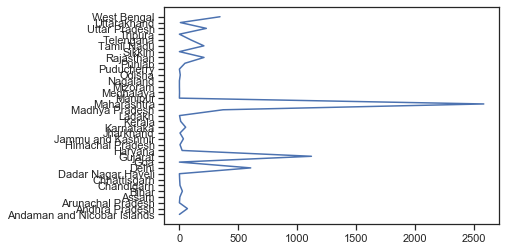

In [31]:
plt.plot(complete_data['Death'],complete_data['Name of State / UT'])

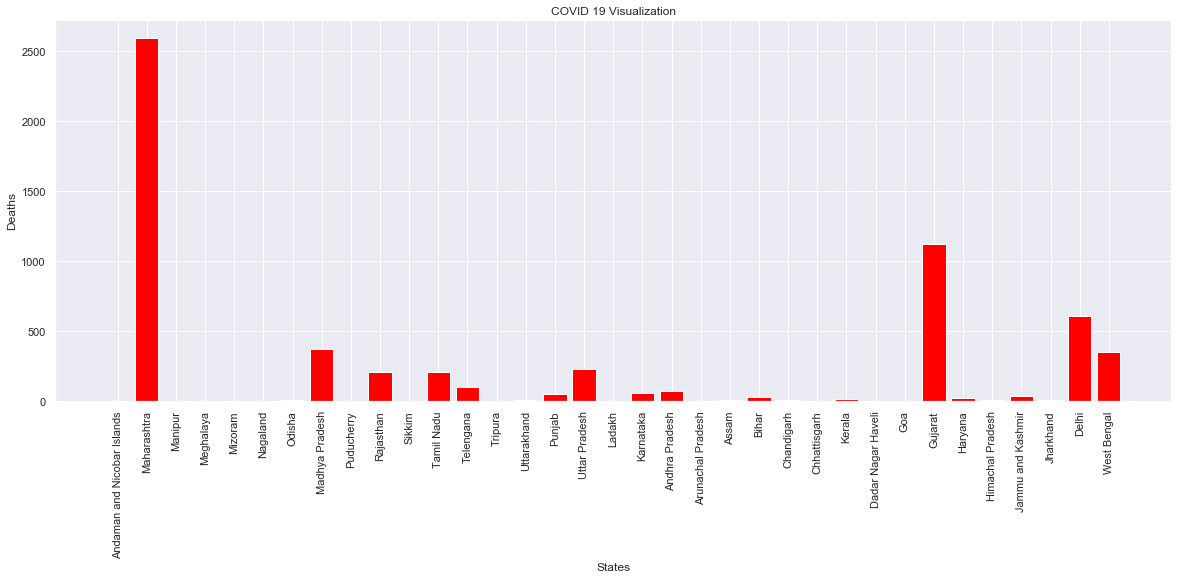

In [95]:
fig, ax = plt.subplots(figsize=(20,7))
ax.bar(complete_data['Name of State / UT'], complete_data['Death'],color="red")
ax.set(title="COVID 19 Visualization",xlabel="States", ylabel="Deaths");
# plt.set()
plt.xticks(rotation=90);


In [97]:
complete_data.head()
india_corona=complete_data.sort_values('Name of State / UT').reset_index(drop=True)
india_corona=india_corona[['Date', 'Name of State / UT', 'Latitude', 'Longitude', 
                               'Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated']]
india_corona

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated
0,2020-06-04,Andaman and Nicobar Islands,11.7401,92.6586,33,0,33
1,2020-06-04,Andhra Pradesh,15.9129,79.7400,4080,68,2466
2,2020-06-04,Arunachal Pradesh,28.2180,94.7278,38,0,1
3,2020-06-04,Assam,26.2006,92.9376,1672,4,413
4,2020-06-04,Bihar,25.0961,85.3131,4390,25,2077
5,2020-06-04,Chandigarh,30.7333,76.7794,301,5,214
6,2020-06-04,Chhattisgarh,21.2787,81.8661,668,2,188
7,2020-06-04,Dadar Nagar Haveli,20.1809,73.0169,8,0,1
8,2020-06-04,Delhi,28.7041,77.1025,23645,606,9542
9,2020-06-04,Goa,15.2993,74.1240,79,0,57


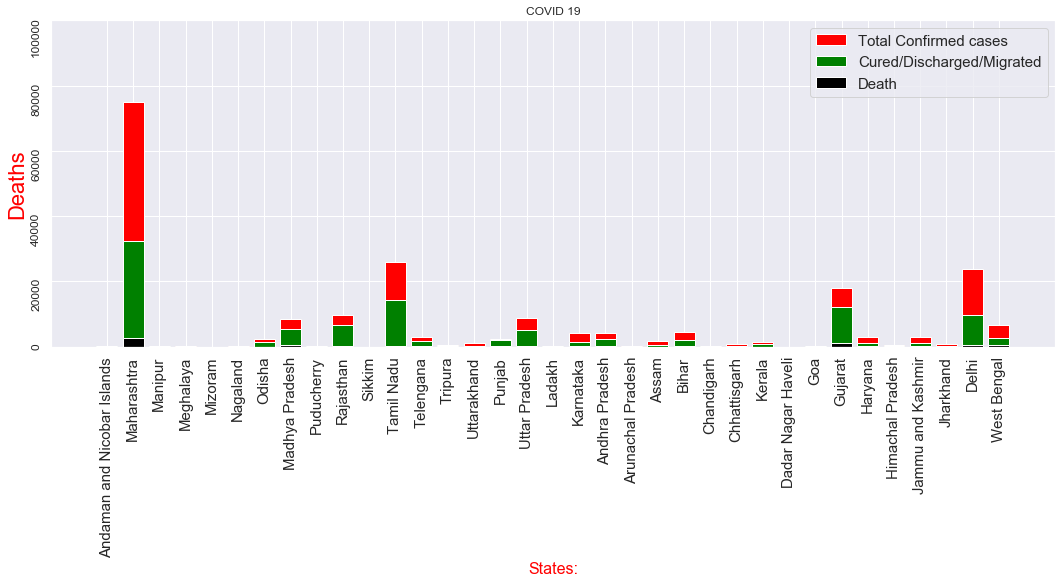

In [98]:
plt.figure(figsize=(20,10))


cat=['Total Confirmed cases','Cured/Discharged/Migrated','Death']

deaths=complete_data['Death']
states=complete_data['Name of State / UT']
total_confrimed_cases=complete_data['Total Confirmed cases']
Cured_Discharged_Migrated=complete_data['Cured/Discharged/Migrated']
p=np.arange(len(states))


plt.bar(p,total_confrimed_cases,color="red")
plt.bar(p,Cured_Discharged_Migrated,color="green")
plt.bar(p,deaths,color="black")





plt.xticks(p,complete_data['Name of State / UT']);

plt.title('COVID 19')

plt.xlabel('States:',color='RED',fontsize=16)
plt.ylabel("Deaths",color='RED',fontsize=22)

plt.legend(cat,loc=1,fontsize=15)

plt.xticks(rotation=90,fontsize=15)
plt.yticks(rotation=90,fontsize=12)

plt.ylim([0,100000])
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### - visualization using the sea born

In [35]:
sns.set(style="ticks", color_codes=True)

Text(0.5, 1.0, 'COVID 19')

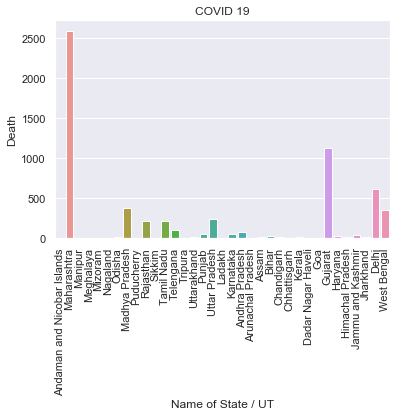

In [99]:
sns.barplot(x='Name of State / UT', y="Death", data=complete_data)
plt.xticks(rotation=90);
plt.title('COVID 19')
# plt.figure(figsize=(10,10))
# plt.show()

In [93]:
import xlrd
import random
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

In [147]:
fp = "D:\Python Projects\Visualize-Women-Harrasment-in-India-using-GeoPandas-master\Igismap\Indian_States.shp"
map_df= gpd.read_file(fp)
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [146]:
map_df

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andhra Pradesh,"MULTIPOLYGON (((81.10380 17.82269, 81.10610 17..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."
5,Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627..."
6,Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650..."
7,Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20..."
8,Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14..."
9,Gujarat,"MULTIPOLYGON (((71.70375 20.99958, 71.70375 20..."


In [109]:
india_corona['Name of State / UT'].replace('Delhi','NCT of Delhi ' ,inplace=True)
india_corona=complete_data.sort_values('Name of State / UT').reset_index(drop=True)
india_corona

,Name of State / UT,Active Cases,Cured/Discharged/Migrated,Death,Total Confirmed cases,Date,Latitude,Longitude
0,Andaman and Nicobar Islands,0,33,0,33,2020-06-04,11.7401,92.6586
1,Andhra Pradesh,1546,2466,68,4080,2020-06-04,15.9129,79.7400
2,Arunachal Pradesh,37,1,0,38,2020-06-04,28.2180,94.7278
3,Assam,1255,413,4,1672,2020-06-04,26.2006,92.9376
4,Bihar,2288,2077,25,4390,2020-06-04,25.0961,85.3131
5,Chandigarh,82,214,5,301,2020-06-04,30.7333,76.7794
6,Chhattisgarh,478,188,2,668,2020-06-04,21.2787,81.8661
7,Dadar Nagar Haveli,7,1,0,8,2020-06-04,20.1809,73.0169
8,Delhi,13497,9542,606,23645,2020-06-04,28.7041,77.1025
9,Goa,22,57,0,79,2020-06-04,15.2993,74.1240


In [105]:
merged = map_df.set_index('st_nm').join(complete_data.set_index('Name of State / UT'))
merged

,geometry,Active Cases,Cured/Discharged/Migrated,Death,Total Confirmed cases,Date,Latitude,Longitude
st_nm,,,,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",1255.0,413.0,4.0,1672.0,2020-06-04,26.2006,92.9376
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",2288.0,2077.0,25.0,4390.0,2020-06-04,25.0961,85.3131
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",82.0,214.0,5.0,301.0,2020-06-04,30.7333,76.7794
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",478.0,188.0,2.0,668.0,2020-06-04,21.2787,81.8661
Dadara & Nagar Havelli,"POLYGON ((73.20657 20.12216, 73.20797 20.10650...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Daman & Diu,"MULTIPOLYGON (((72.89335 20.44539, 72.89281 20...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
Goa,"MULTIPOLYGON (((74.11918 14.75344, 74.11350 14...",22.0,57.0,0.0,79.0,2020-06-04,15.2993,74.1240
